**Módulo 14 – Tarefa 1**

In [1]:
# Importando bibliotecas necessárias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Estilo dos gráficos
sns.set(style='whitegrid')

In [2]:
def plota_pivot_table(df, value, index, func, ylabel, xlabel, opcao='nada'):
    """
    Gera gráficos a partir de uma tabela dinâmica (pivot_table) e personaliza o tipo de visualização.

    Parâmetros:
        df (DataFrame): base de dados
        value (str): coluna cujos valores serão agregados
        index (str ou lista): coluna(s) que servirão de índice
        func (str): função de agregação (ex: 'mean', 'median')
        ylabel (str): rótulo do eixo Y
        xlabel (str): rótulo do eixo X
        opcao (str): tipo de transformação visual ('nada', 'unstack' ou 'sort')
    """
    tabela = pd.pivot_table(df, values=value, index=index, aggfunc=func)

    if opcao == 'unstack':
        tabela = tabela.unstack()
    elif opcao == 'sort':
        tabela = tabela.sort_values(value)

    tabela.plot(figsize=(15, 5))
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.tight_layout()


In [4]:
# Lista de caminhos para os arquivos dos meses escolhidos
arquivos = [
    './SINASC_RO_2019_MAR.csv',
    './SINASC_RO_2019_ABR.csv',
    './SINASC_RO_2019_MAI.csv',
    './SINASC_RO_2019_JUN.csv',
    './SINASC_RO_2019_DEZ.csv'
]


Gráficos salvos para o mês: 2019-03
Gráficos salvos para o mês: 2019-04
Gráficos salvos para o mês: 2019-05
Gráficos salvos para o mês: 2019-06


/home/luiza/anaconda3/lib/python3.12/site-packages/pandas/plotting/_matplotlib/core.py:580: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


Gráficos salvos para o mês: 2019-12


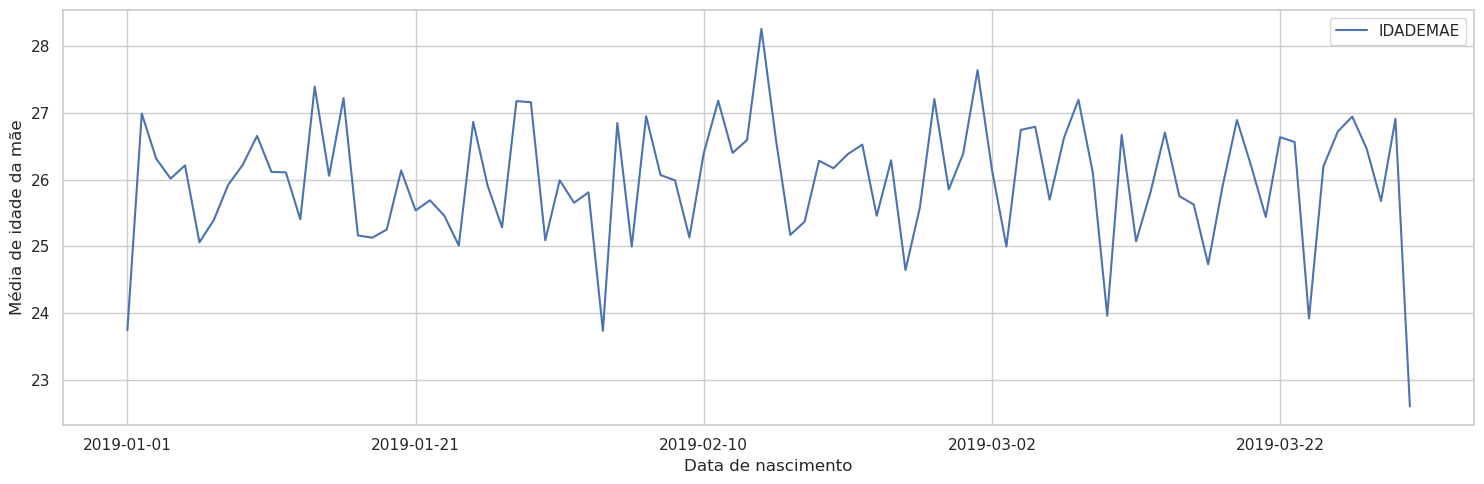

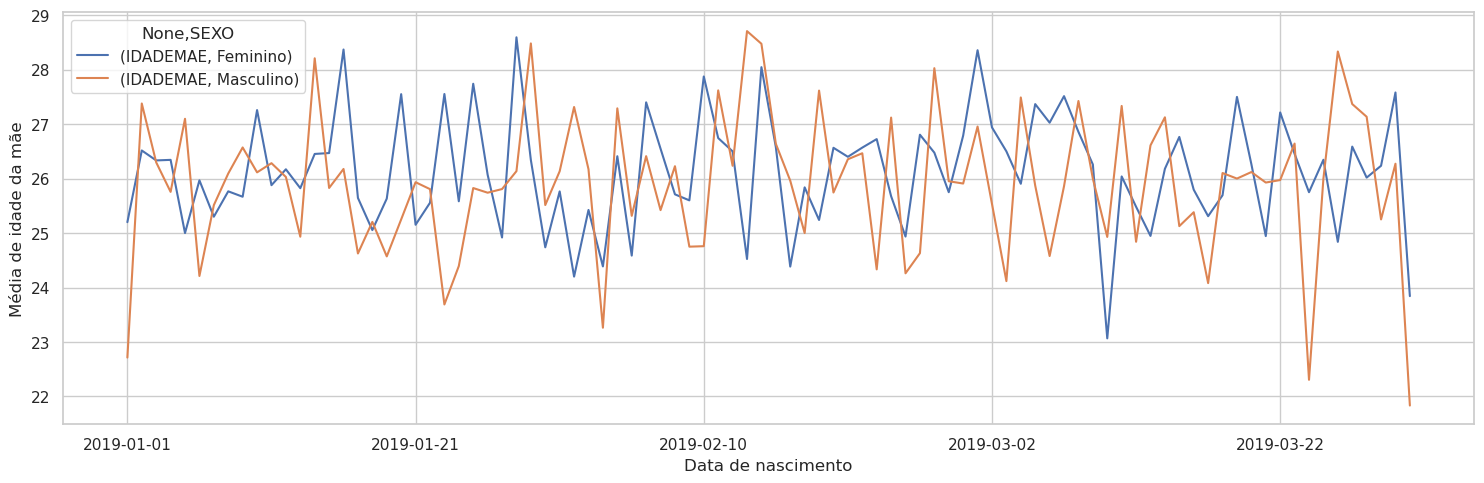

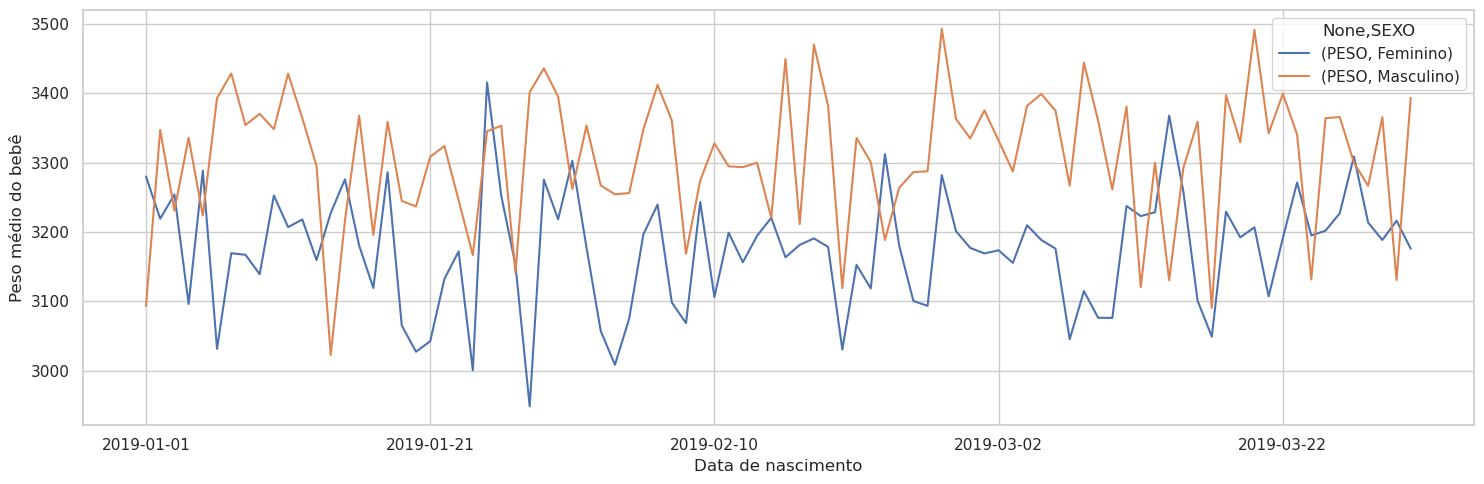

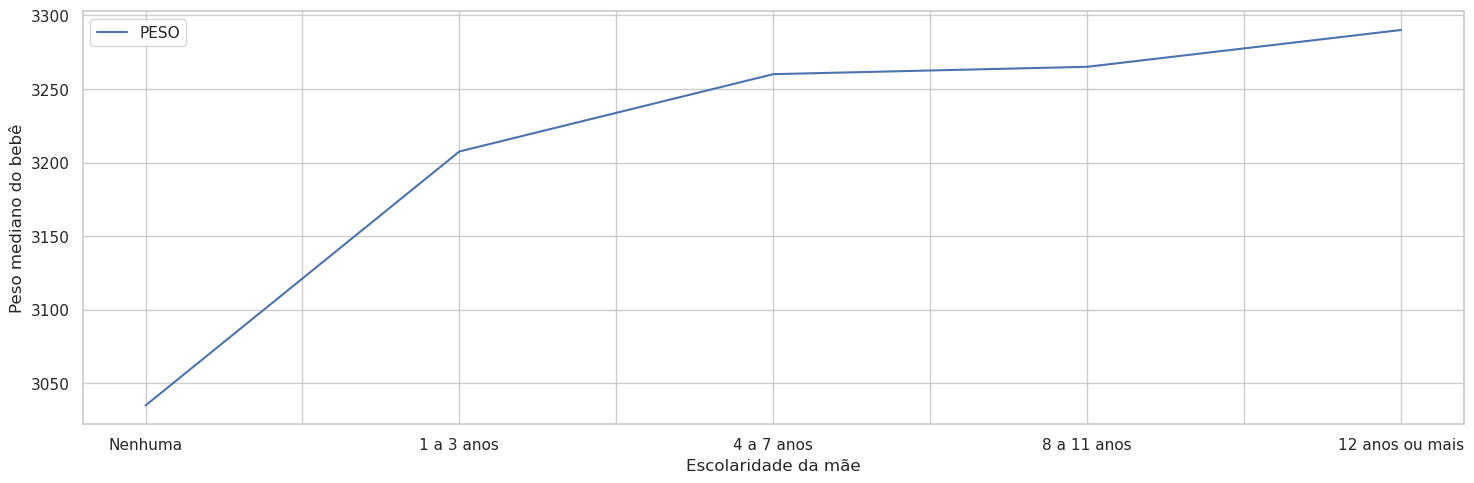

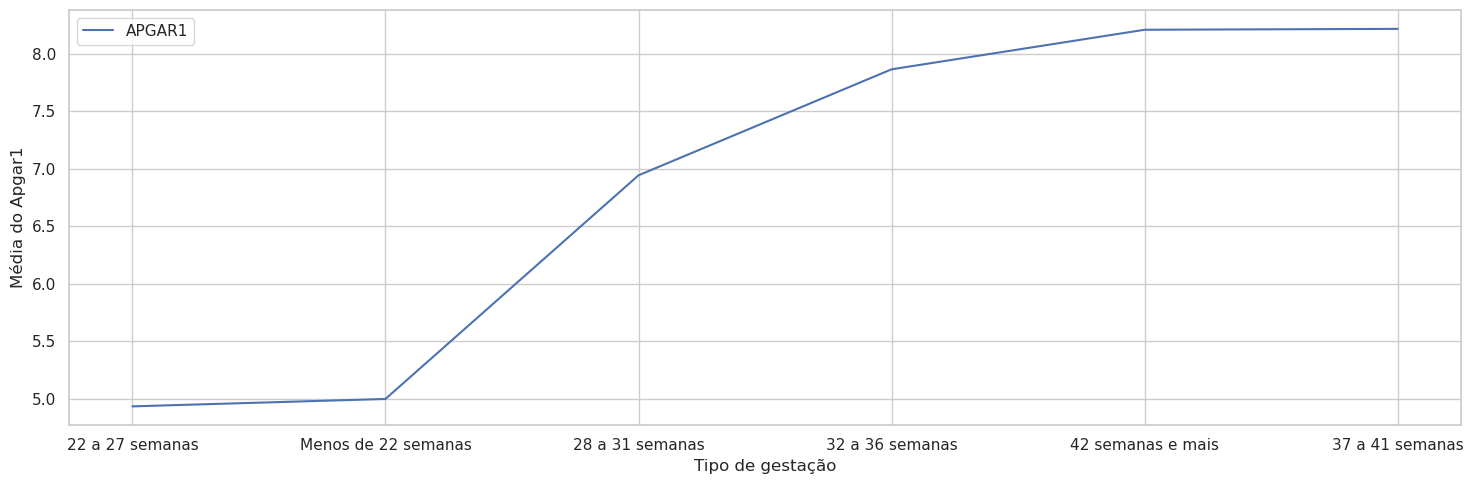

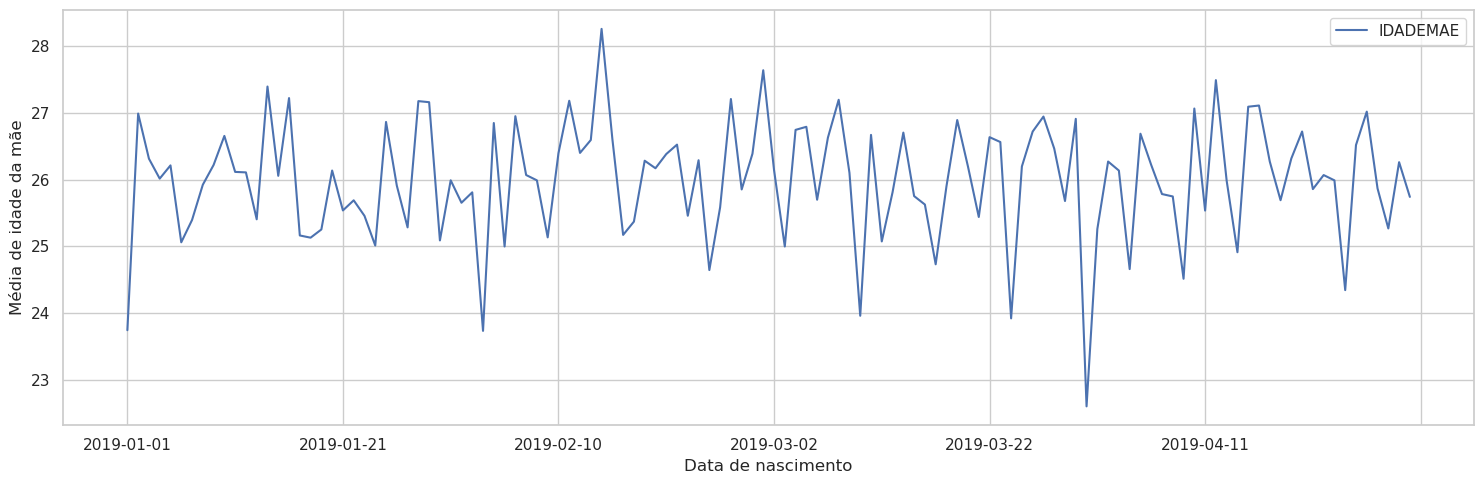

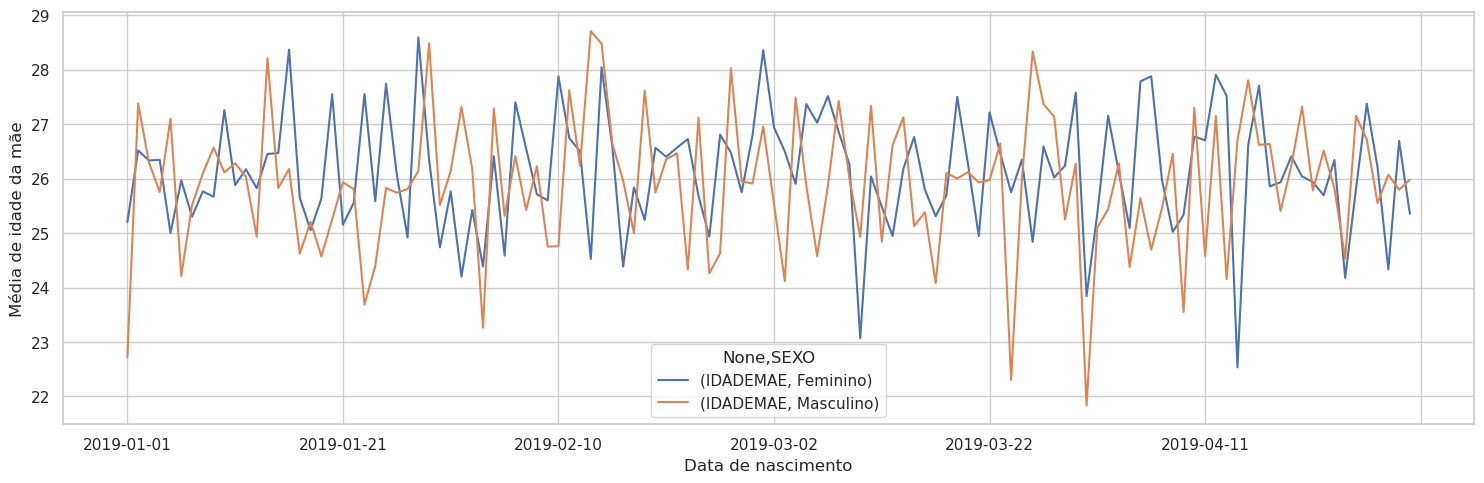

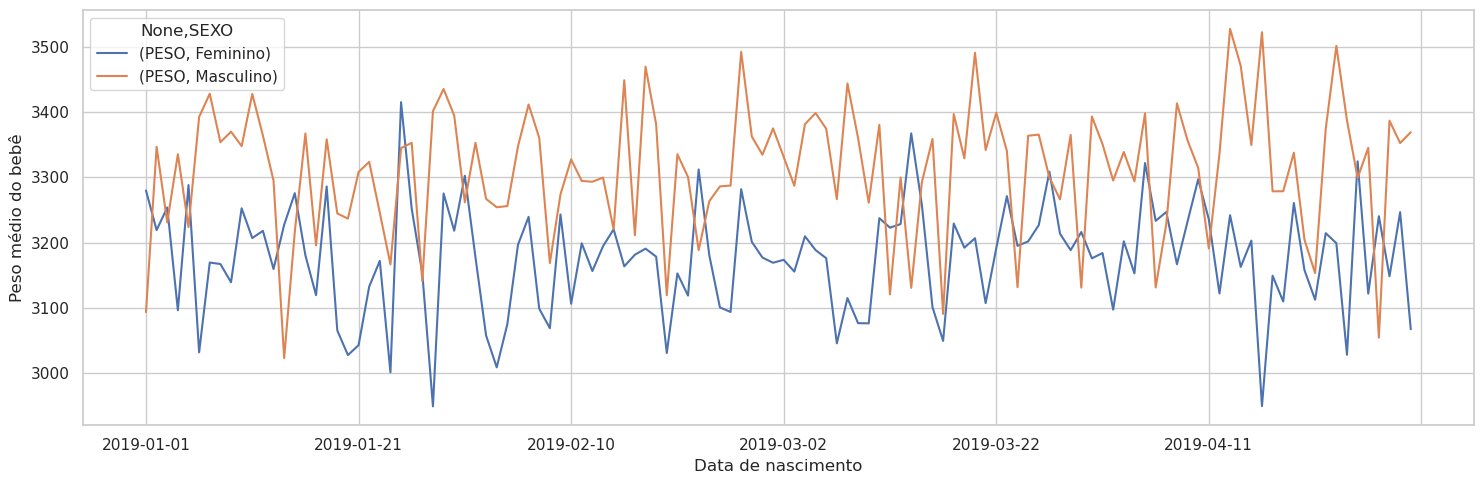

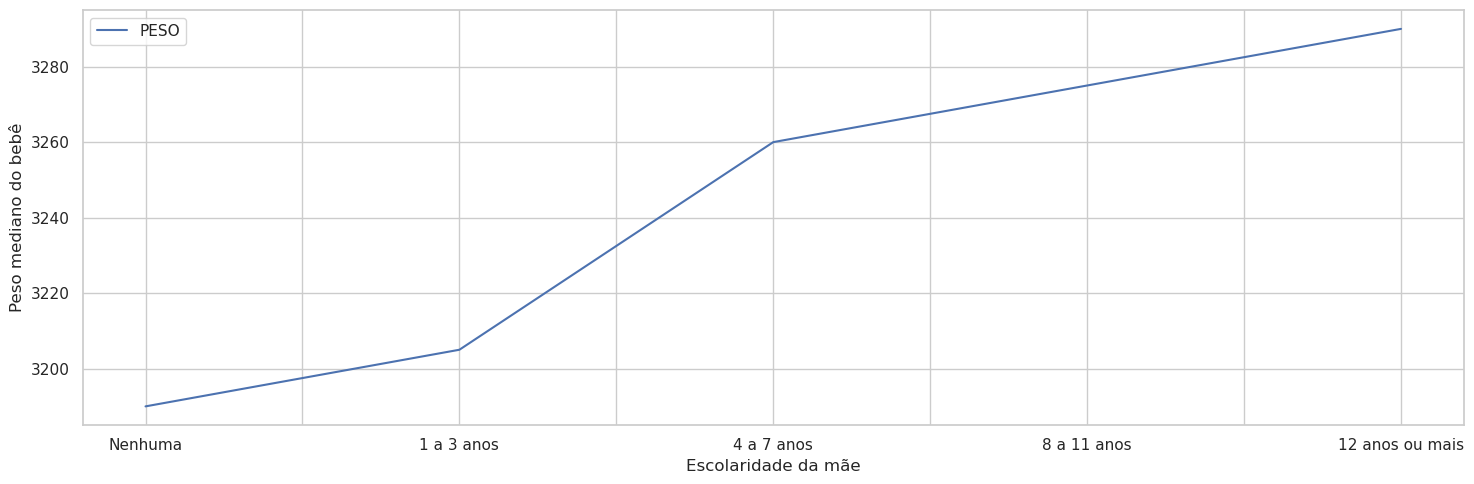

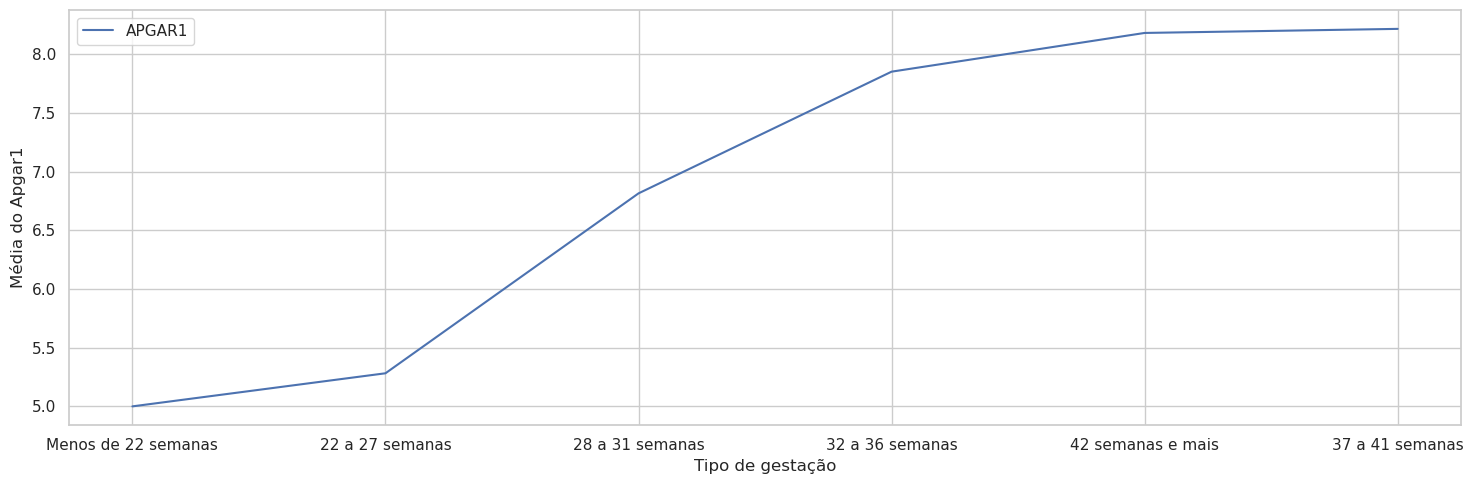

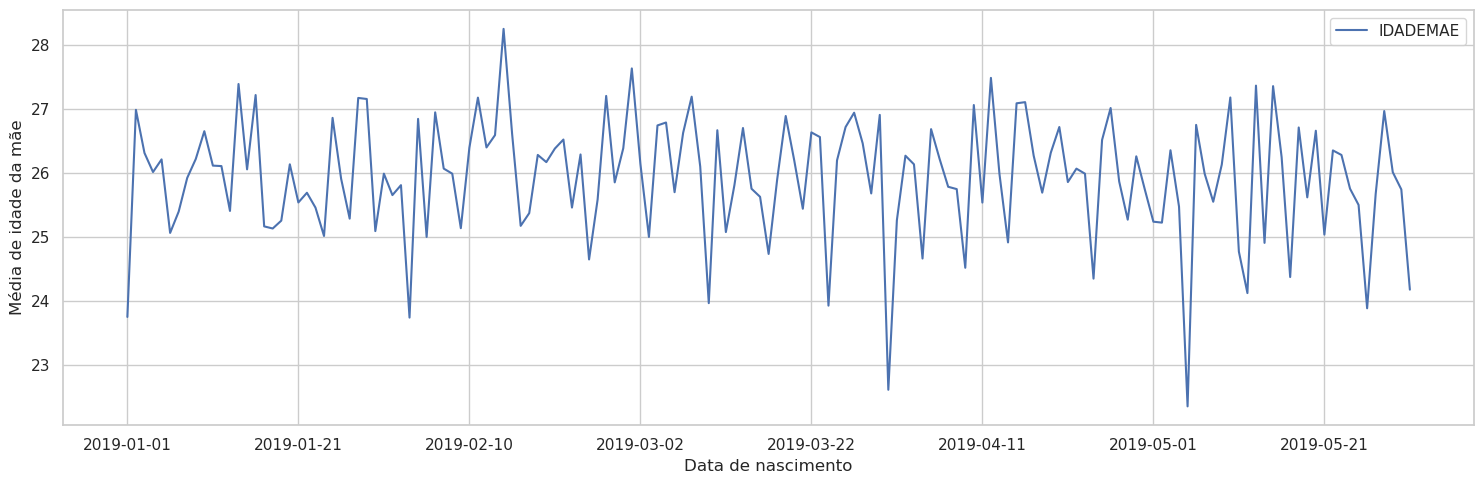

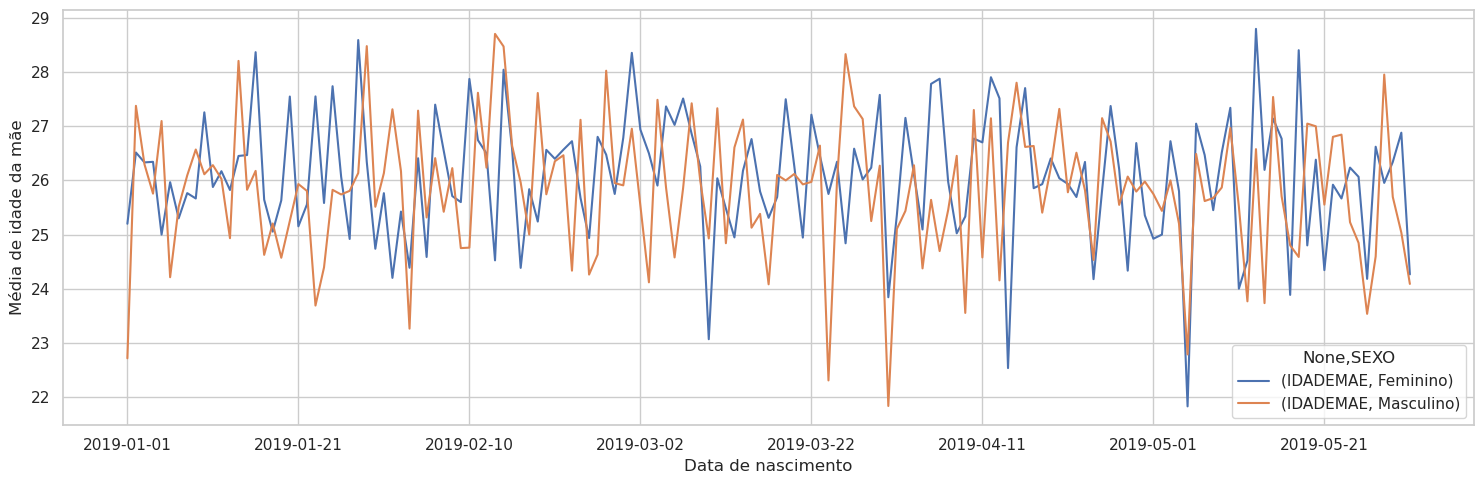

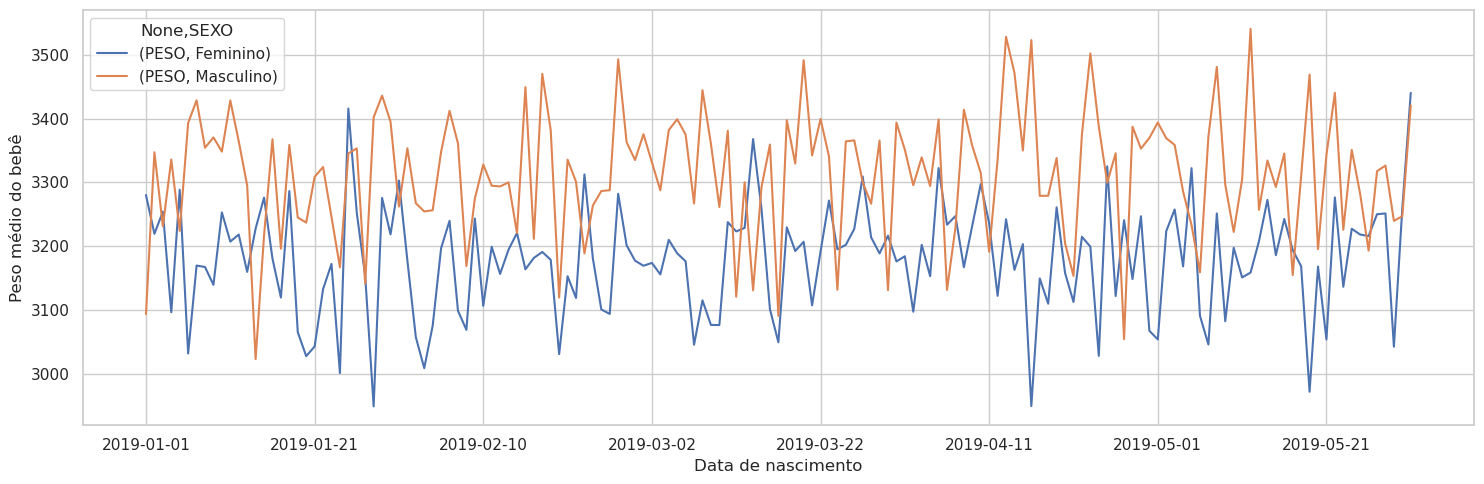

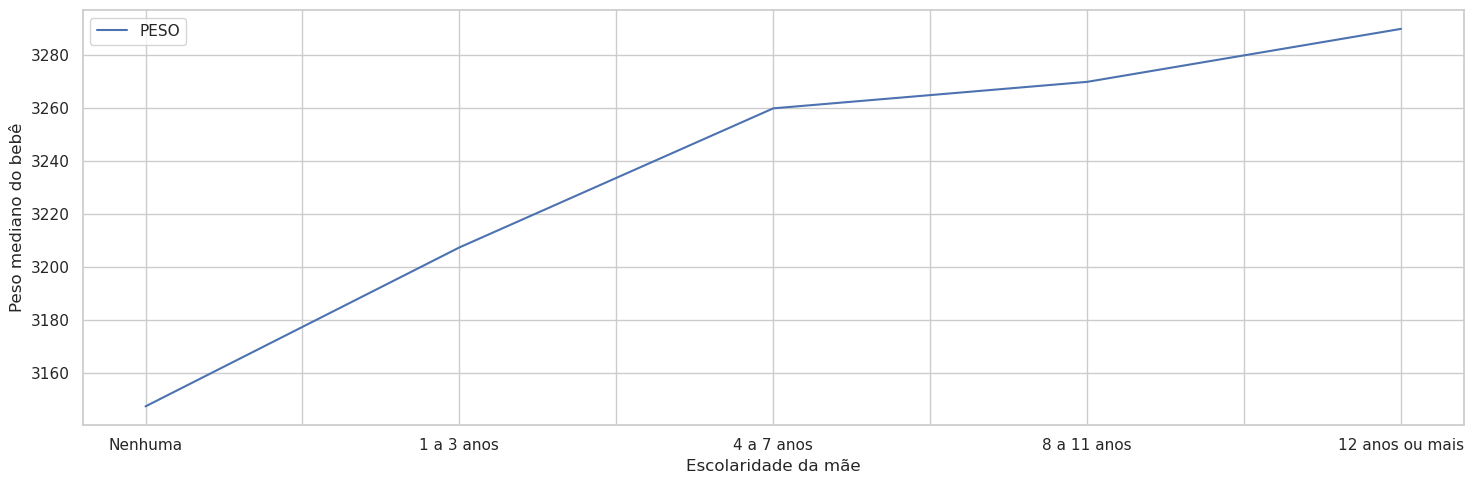

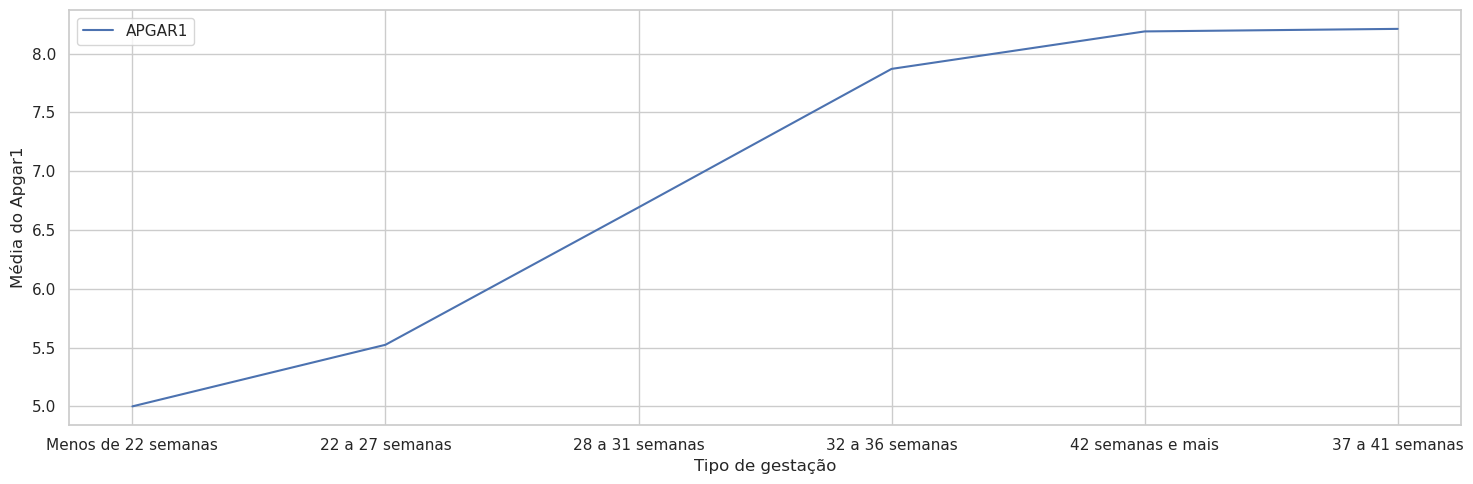

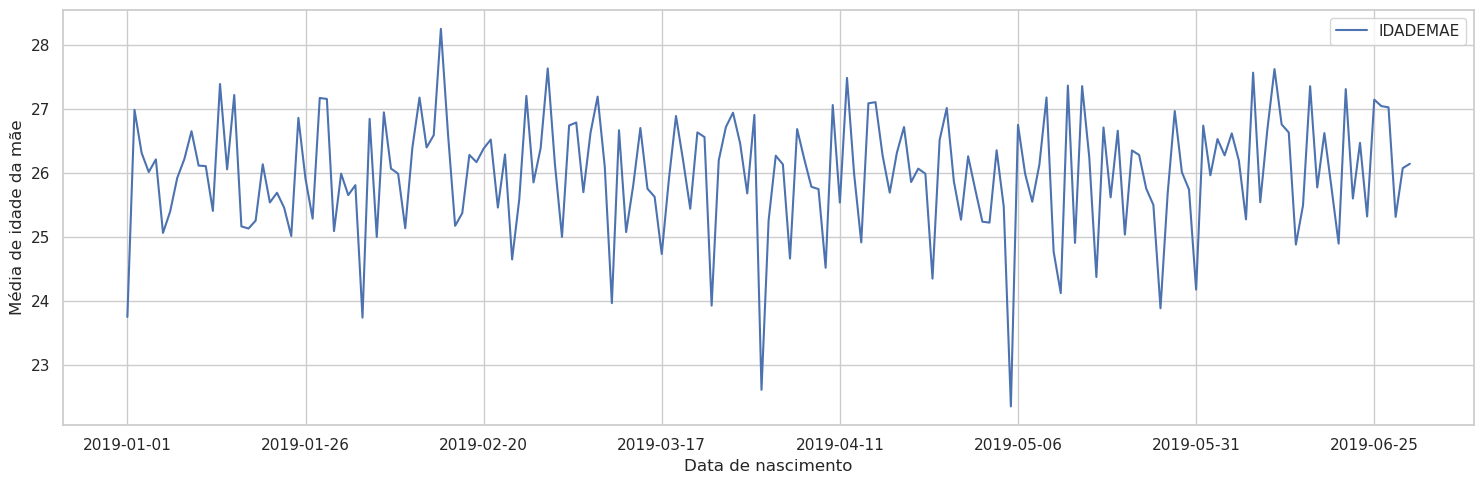

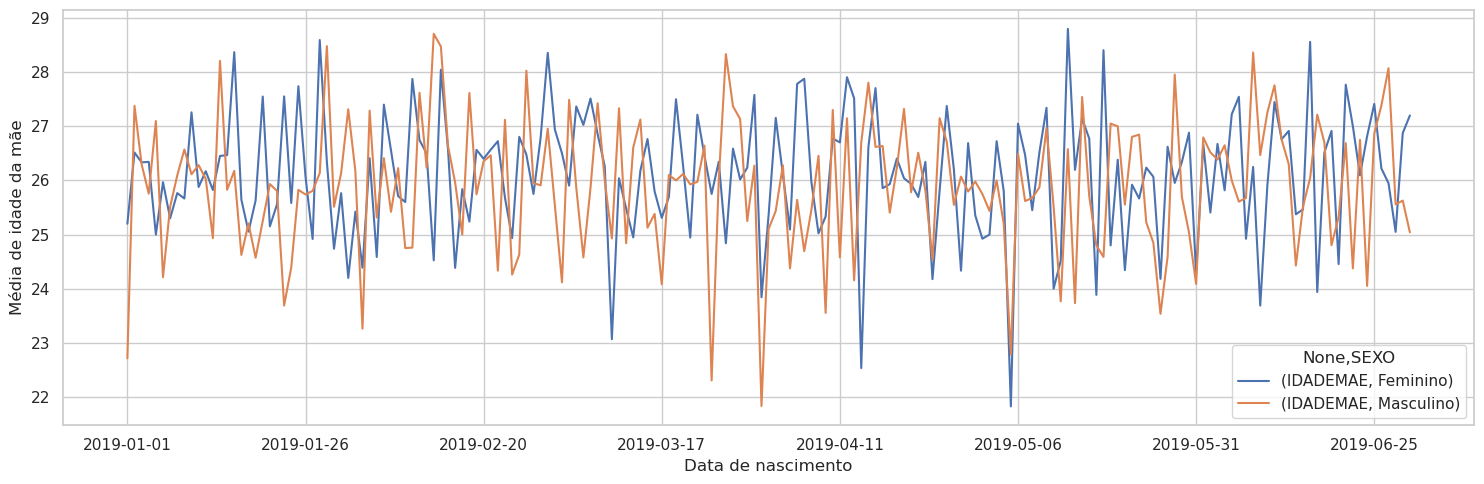

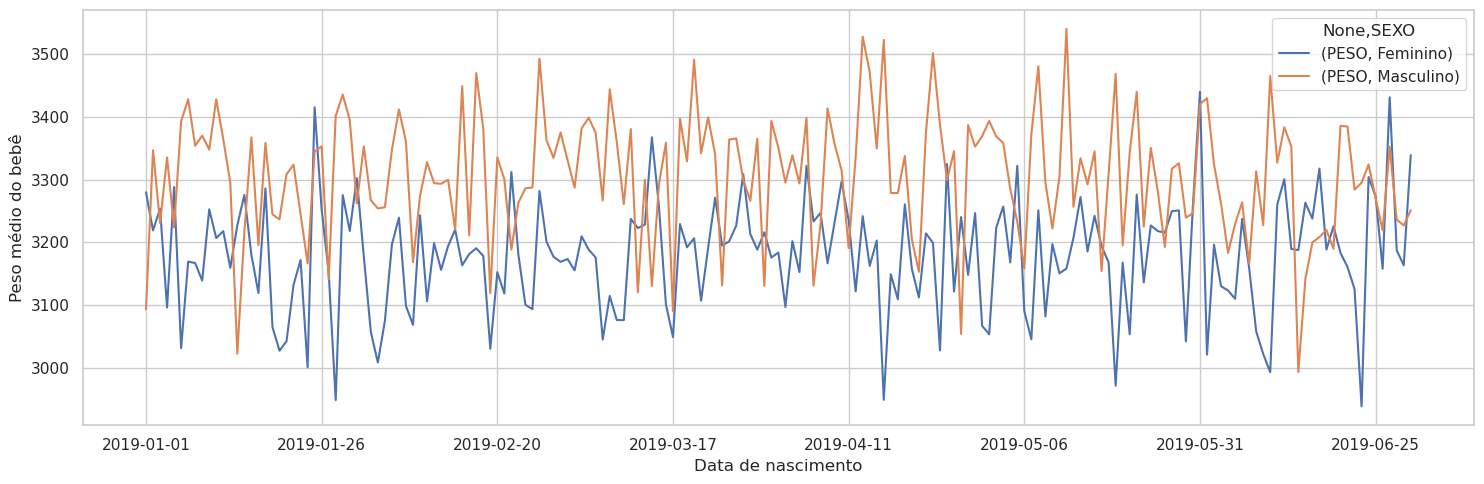

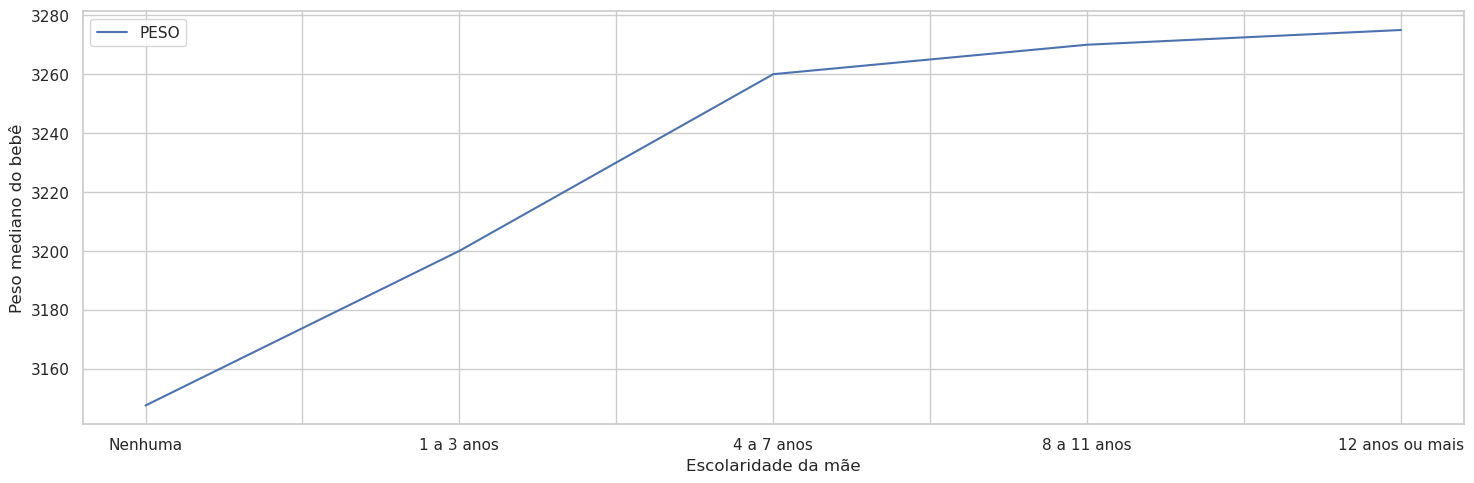

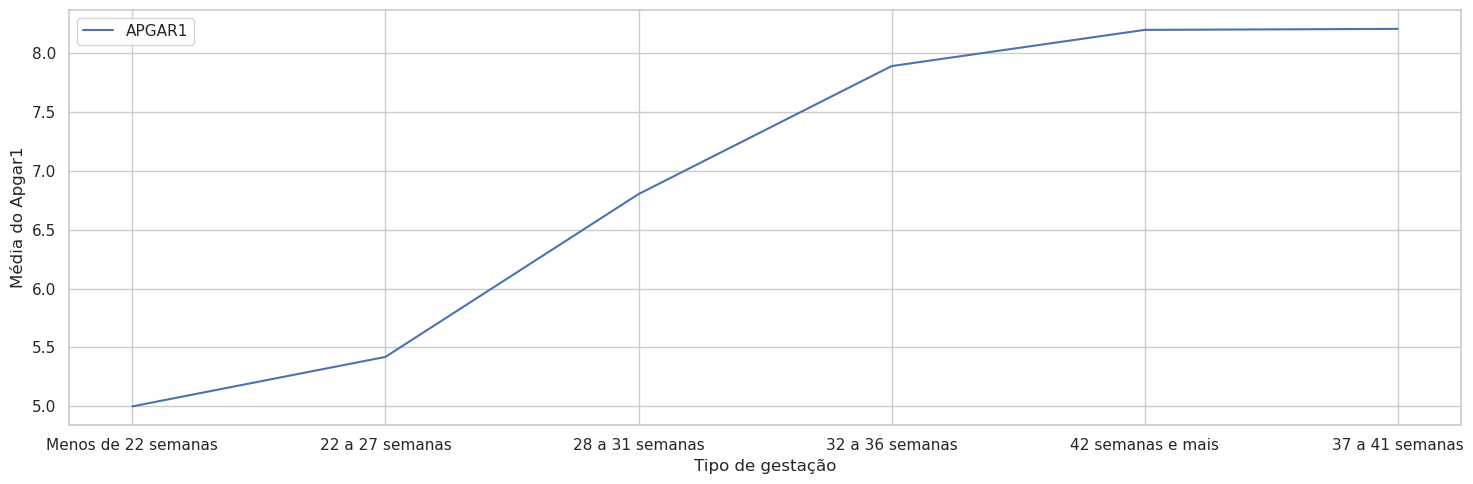

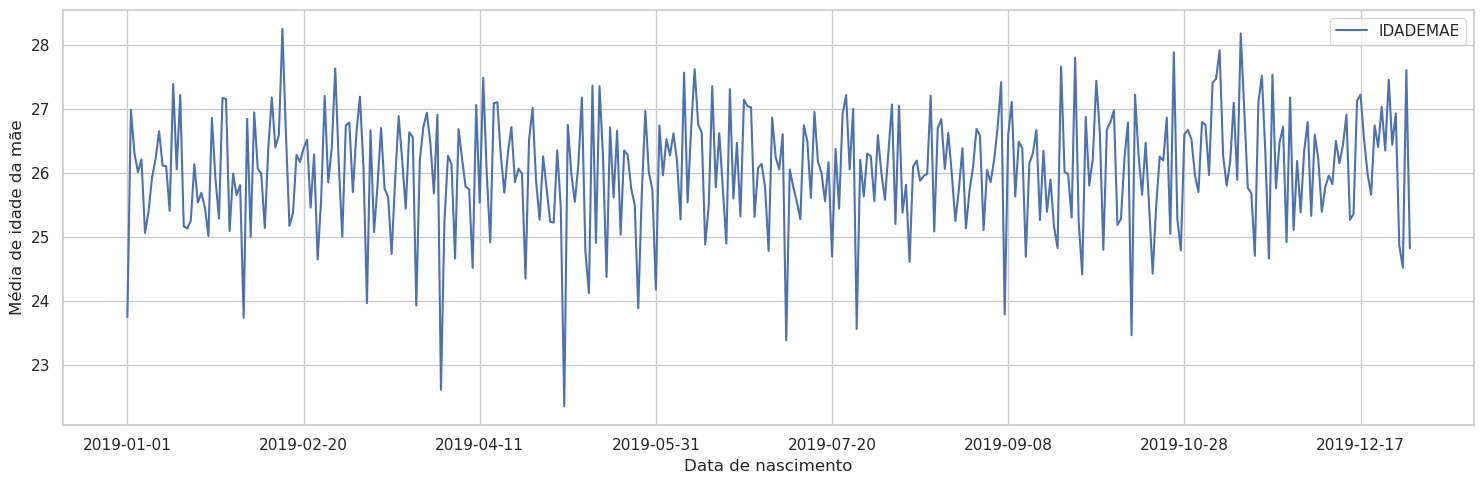

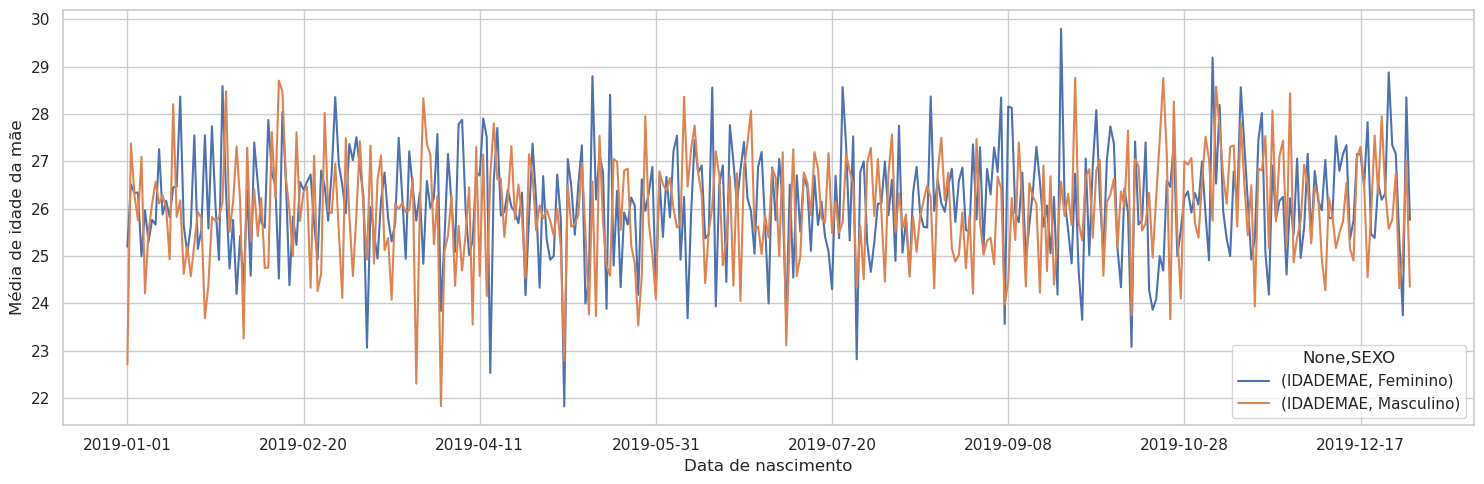

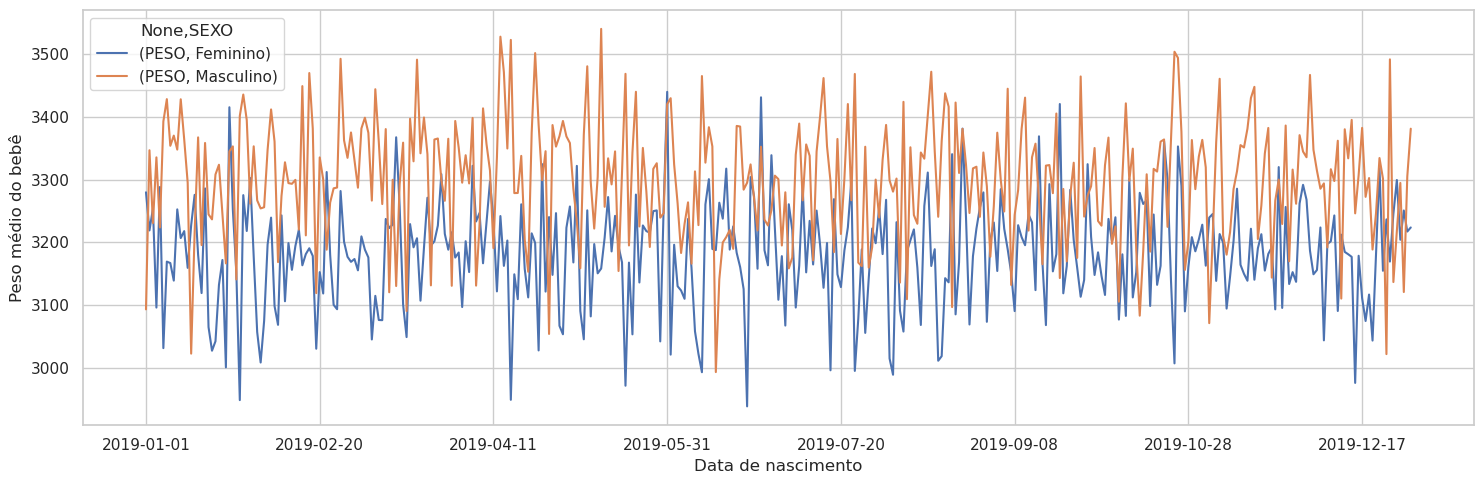

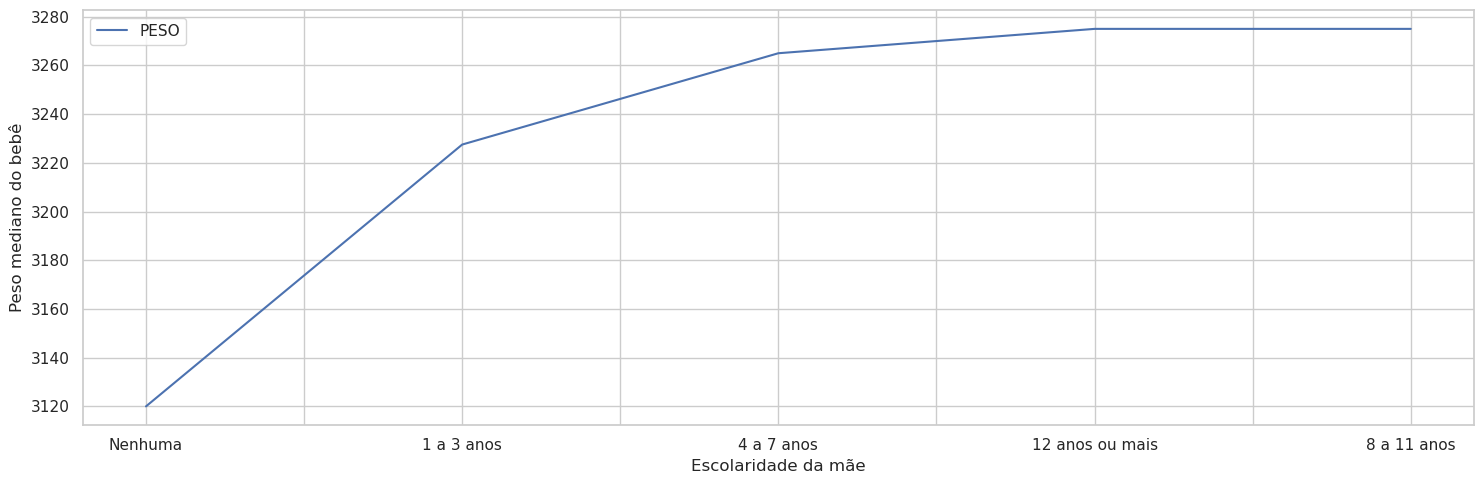

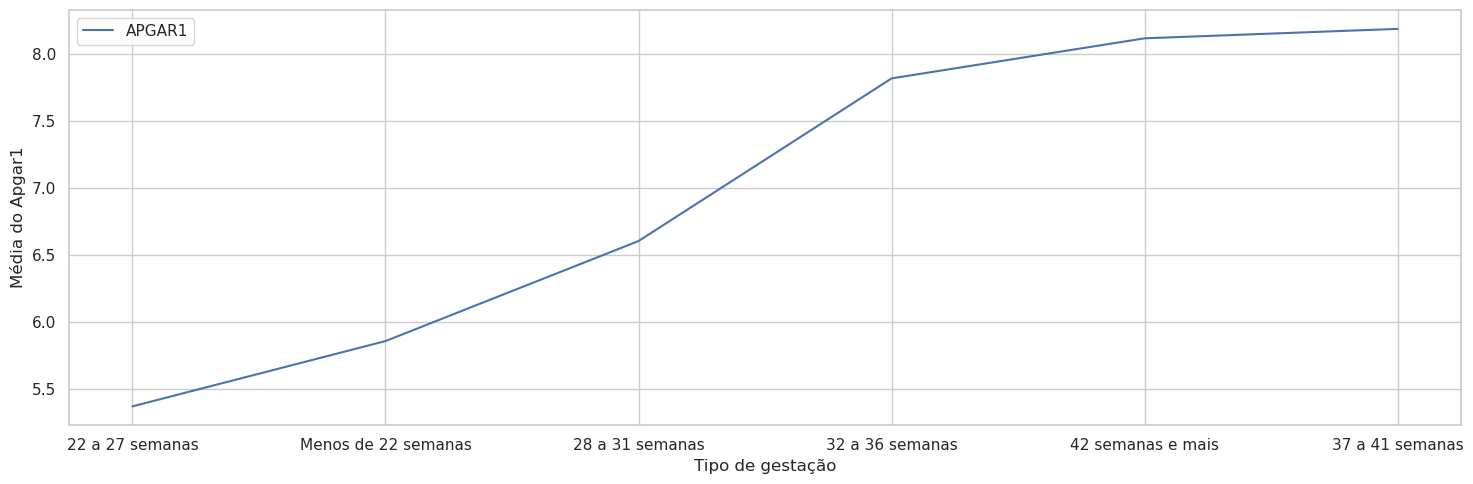

In [5]:
# Loop para processar cada mês individualmente
for caminho in arquivos:
    # Lê o arquivo
    sinasc = pd.read_csv(caminho)

    # Extrai ano e mês do campo DTNASC (formato: AAAA-MM-DD)
    max_data = sinasc.DTNASC.max()[:7]

    # Cria a pasta de saída se ainda não existir
    pasta_saida = f'./output/figs/{max_data}'
    os.makedirs(pasta_saida, exist_ok=True)

    # Gera e salva os gráficos
    plota_pivot_table(sinasc, 'IDADEMAE', 'DTNASC', 'mean',
                      'Média de idade da mãe', 'Data de nascimento')
    plt.savefig(f'{pasta_saida}/media_idade_mae_por_data.png')

    plota_pivot_table(sinasc, 'IDADEMAE', ['DTNASC', 'SEXO'], 'mean',
                      'Média de idade da mãe', 'Data de nascimento', 'unstack')
    plt.savefig(f'{pasta_saida}/media_idade_mae_por_sexo.png')

    plota_pivot_table(sinasc, 'PESO', ['DTNASC', 'SEXO'], 'mean',
                      'Peso médio do bebê', 'Data de nascimento', 'unstack')
    plt.savefig(f'{pasta_saida}/peso_medio_bebe_por_sexo.png')

    plota_pivot_table(sinasc, 'PESO', 'ESCMAE', 'median',
                      'Peso mediano do bebê', 'Escolaridade da mãe', 'sort')
    plt.savefig(f'{pasta_saida}/peso_mediano_por_escolaridade_mae.png')

    plota_pivot_table(sinasc, 'APGAR1', 'GESTACAO', 'mean',
                      'Média do Apgar1', 'Tipo de gestação', 'sort')
    plt.savefig(f'{pasta_saida}/media_apgar1_por_gestacao.png')

    print(f'Gráficos salvos para o mês: {max_data}')


Para deixar o processo mais automatizado no futuro, podemos:

1. Utilizar a biblioteca `glob` para buscar automaticamente todos os arquivos `.csv` em uma pasta:
   Exemplo: `glob.glob('./dados/SINASC_RO_2019_*.csv')`

2. Tornar o código mais genérico, usando funções que aceitem o caminho de entrada e o destino de saída como parâmetros.

3. Criar um script Python separado ou um notebook que peça ao usuário o ano e os meses desejados, para gerar os gráficos com base nessa seleção.

4. Salvar os gráficos também em formatos como `.pdf` para uso em relatórios.

5. Padronizar os nomes dos arquivos e pastas, facilitando a navegação e reutilização dos dados.